In [7]:
%pip install --upgrade pip
%pip install matplotlib seaborn shap joblib scikit-learn xgboost lightgbm

Note: you may need to restart the kernel to use updated packages.
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
# =============================================
# 1️⃣ Import Libraries & Custom Modules
# =============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib
from sklearn.model_selection import train_test_split

import sys
import os
sys.path.append(os.path.abspath('../'))  

from src import preprocess, model, utils

import warnings
warnings.filterwarnings("ignore")

In [9]:
# =============================================
# 2️⃣ Load & Preprocess Data
# =============================================

# Load data
df = preprocess.load_data('../data/Churn_Modelling.csv')

# Clean data
df = preprocess.clean_data(df)

# Encode categorical features
df = preprocess.encode_features(df)

# Scale numerical features
df = preprocess.scale_features(df)

   CreditScore  Gender       Age    Tenure   Balance  NumOfProducts  \
0    -0.326221       0  0.293517 -1.041760 -1.225848      -0.911583   
1    -0.440036       0  0.198164 -1.387538  0.117350      -0.911583   
2    -1.536794       0  0.293517  1.032908  1.333053       2.527057   
3     0.501521       0  0.007457 -1.387538 -1.225848       0.807737   
4     2.063884       0  0.388871 -1.041760  0.785728      -0.911583   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0          1               1         0.021886       1              False   
1          0               1         0.216534       0              False   
2          1               0         0.240687       1              False   
3          0               0        -0.108918       0              False   
4          1               1        -0.365276       0              False   

   Geography_Spain  
0            False  
1             True  
2            False  
3            False  
4          

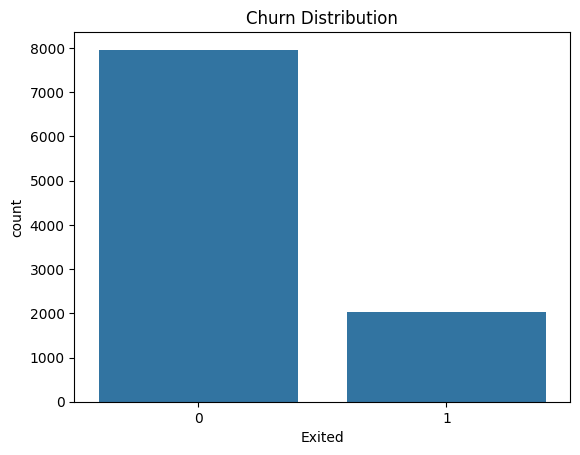

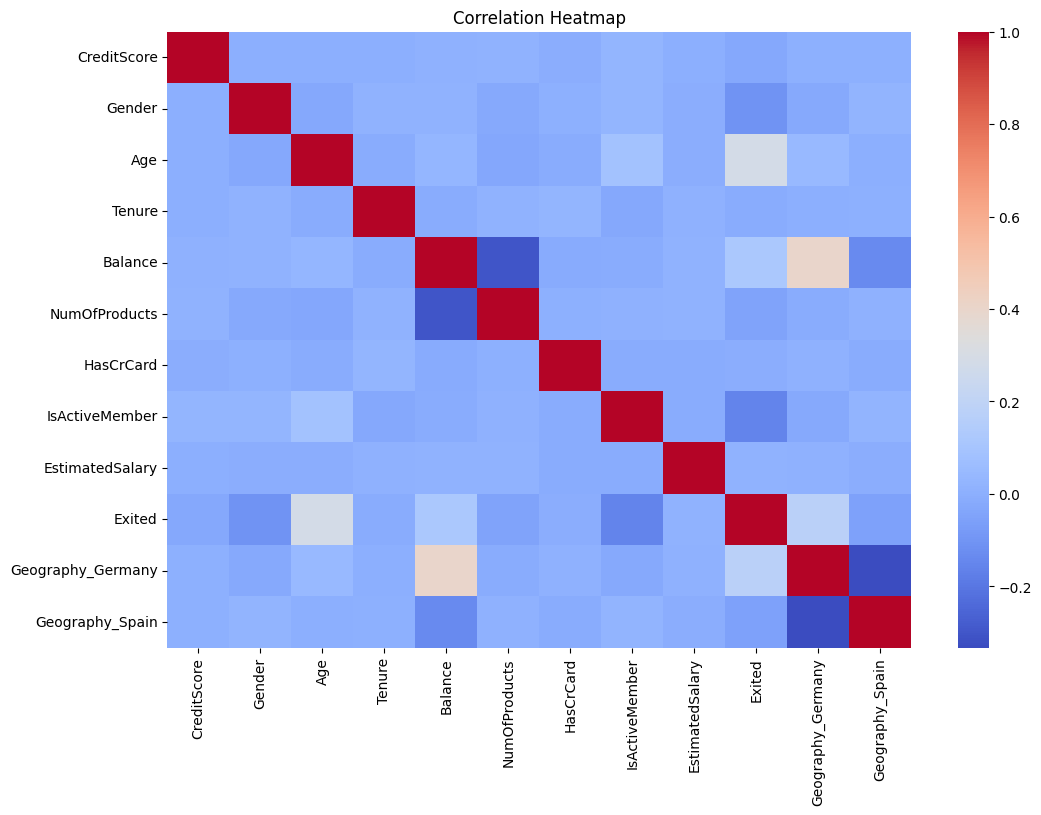

In [10]:
# =============================================
# 3️⃣ EDA (Optional, basic visualizations)
# =============================================

print(df.head())

# Target distribution
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# =============================================
# 4️⃣ Split Data
# =============================================

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Logistic Regression Evaluation:
Accuracy: 0.808
Confusion Matrix:
 [[1540   53]
 [ 331   76]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



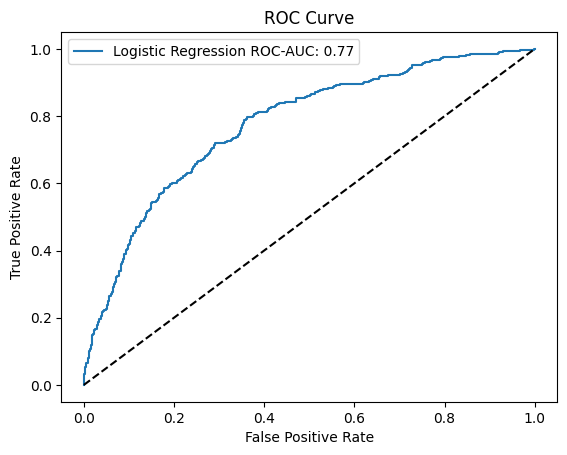


Random Forest Evaluation:
Accuracy: 0.861
Confusion Matrix:
 [[1537   56]
 [ 222  185]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



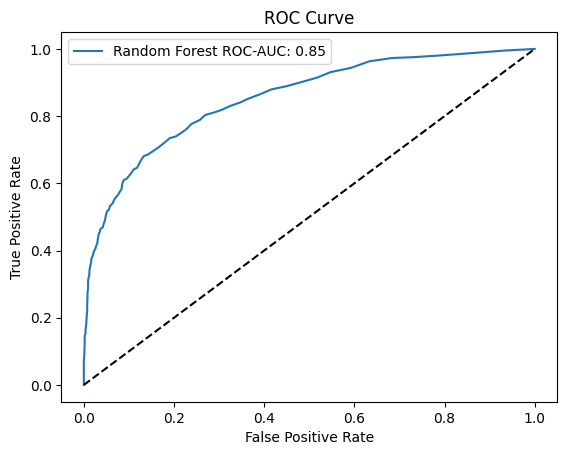


XGBoost Evaluation:
Accuracy: 0.849
Confusion Matrix:
 [[1502   91]
 [ 211  196]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.68      0.48      0.56       407

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



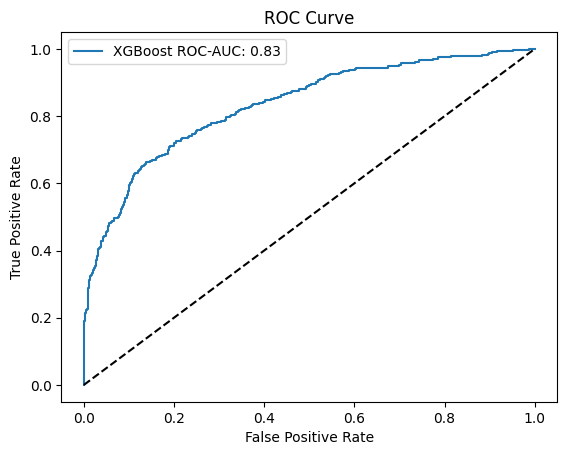

[LightGBM] [Info] Number of positive: 1630, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019

LightGBM Evaluation:
Accuracy: 0.862
Confusion Matrix:
 [[1530   63]
 [ 213  194]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.48      0.58       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



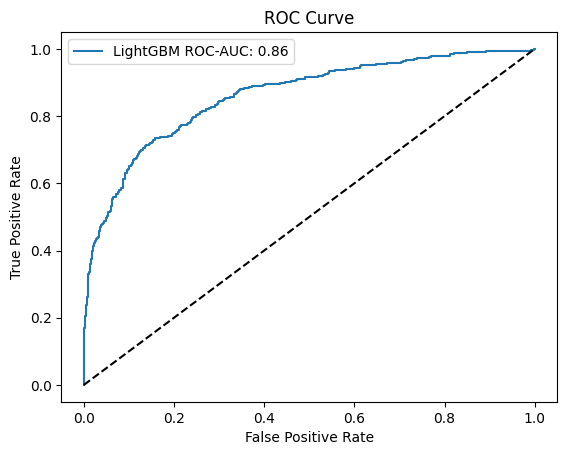

In [14]:
# =============================================
# 5️⃣ Train Multiple Models
# =============================================

# Logistic Regression
lr_model = model.train_logistic_regression(X_train, y_train)
print("\nLogistic Regression Evaluation:")
utils.evaluate_model(lr_model, X_test, y_test)
utils.plot_roc(lr_model, X_test, y_test, "Logistic Regression")

# Random Forest
rf_model = model.train_random_forest(X_train, y_train)
print("\nRandom Forest Evaluation:")
utils.evaluate_model(rf_model, X_test, y_test)
utils.plot_roc(rf_model, X_test, y_test, "Random Forest")

# XGBoost
xgb_model = model.train_xgboost(X_train, y_train)
print("\nXGBoost Evaluation:")
utils.evaluate_model(xgb_model, X_test, y_test)
utils.plot_roc(xgb_model, X_test, y_test, "XGBoost")

# LightGBM
lgbm_model = model.train_lightgbm(X_train, y_train)
print("\nLightGBM Evaluation:")
utils.evaluate_model(lgbm_model, X_test, y_test)
utils.plot_roc(lgbm_model, X_test, y_test, "LightGBM")


Calculating SHAP values for XGBoost model...


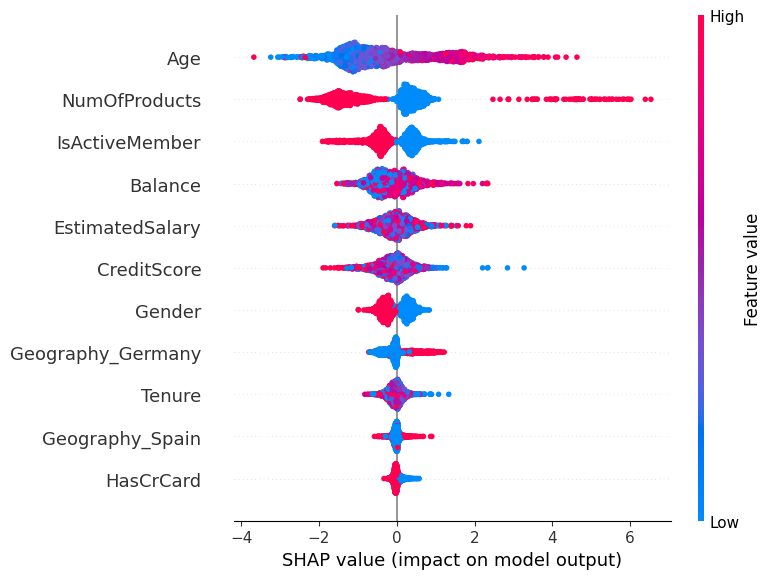

In [15]:
# =============================================
# 6️⃣ Model Explainability with SHAP
# =============================================

print("\nCalculating SHAP values for XGBoost model...")

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:
# =============================================
# 7️⃣ Save Final Model
# =============================================

joblib.dump(xgb_model, '../outputs/churn_model.pkl')
print("\n✅ Final model saved to outputs/churn_model.pkl")


✅ Final XGBoost model saved to outputs/churn_model.pkl
